In [35]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Team data files
hof_path = 'HOF.csv'
player_awards_path = 'AwardsPlayers.csv'
coach_awards_path = 'AwardsCoaches.csv'
nhl_team_path = 'Teams.csv'
master_path = 'Master.csv'

# Read the mouse data and the study results
nhl_team_data = pd.read_csv(nhl_team_path)
player_awards_data = pd.read_csv(player_awards_path)
hof_data = pd.read_csv(hof_path)
coach_awards_data = pd.read_csv(coach_awards_path)
master_data = pd.read_csv(master_path)
# Display the data table for preview
#nhl_team_data.head()

# Merge data
#merged_data = pd.merge(coach_awards_data, player_awards_data, on='lgID')

player_awards_data.head()


,playerID,award,year,lgID,note,pos
0,malonjo01,Art Ross,1917,NHL,NaN,NaN
1,cleghod01,Art Ross,1918,NHL,NaN,NaN
2,malonjo01,Art Ross,1919,NHL,NaN,NaN
3,lalonne01,Art Ross,1920,NHL,NaN,NaN
4,broadpu01,Art Ross,1921,NHL,NaN,NaN


In [19]:
# check for duplicates. there are many
columns_to_check_duplicates = ['year', 'playerID', 'award', 'lgID', 'note', 'pos']

# drop duplicates
cleaned_df = player_awards_data.drop_duplicates(subset=columns_to_check_duplicates)

cleaned_df.head()

,playerID,award,year,lgID,note,pos
0,malonjo01,Art Ross,1917,NHL,NaN,NaN
1,cleghod01,Art Ross,1918,NHL,NaN,NaN
2,malonjo01,Art Ross,1919,NHL,NaN,NaN
3,lalonne01,Art Ross,1920,NHL,NaN,NaN
4,broadpu01,Art Ross,1921,NHL,NaN,NaN


In [20]:
dropped_df = cleaned_df.drop('note', axis=1)
dropped_df.head()


,playerID,award,year,lgID,pos
0,malonjo01,Art Ross,1917,NHL,NaN
1,cleghod01,Art Ross,1918,NHL,NaN
2,malonjo01,Art Ross,1919,NHL,NaN
3,lalonne01,Art Ross,1920,NHL,NaN
4,broadpu01,Art Ross,1921,NHL,NaN


In [21]:
# Show the distrubution of awards and HOF inductions over the decades 

# Extract the decade from the year column
dropped_df['decade'] = (dropped_df['year'] // 10) * 10

# Group by decade and award category
grouped_data = dropped_df.groupby(['decade', 'award']).size().reset_index(name='count')

grouped_data

,decade,award,count
0,1910,Art Ross,3
1,1920,Art Ross,10
2,1920,Hart,7
3,1920,Lady Byng,6
4,1920,Vezina,4
...,...,...,...
125,2010,Plus-Minus,2
126,2010,Richard,2
127,2010,Second Team All-Star,12
128,2010,Selke,2


In [26]:
# Find unique awards
unique_awards = grouped_data['award'].unique()

unique_awards

array(['Art Ross', 'Hart', 'Lady Byng', 'Vezina', 'Calder',
       'First Team All-Star', 'Second Team All-Star', 'Norris',
       'Conn Smythe', 'Masterton', 'Davidson', 'Deneau', 'Hatskin',
       'Howe', 'Hunter', 'Kaplan', 'Murphy', 'Pearson', 'Playoff MVP',
       'Selke', 'All-Rookie', 'Jennings', 'King Clancy', 'Plus-Minus',
       'Crozier', 'Richard', 'Lindsay', 'Messier'], dtype=object)

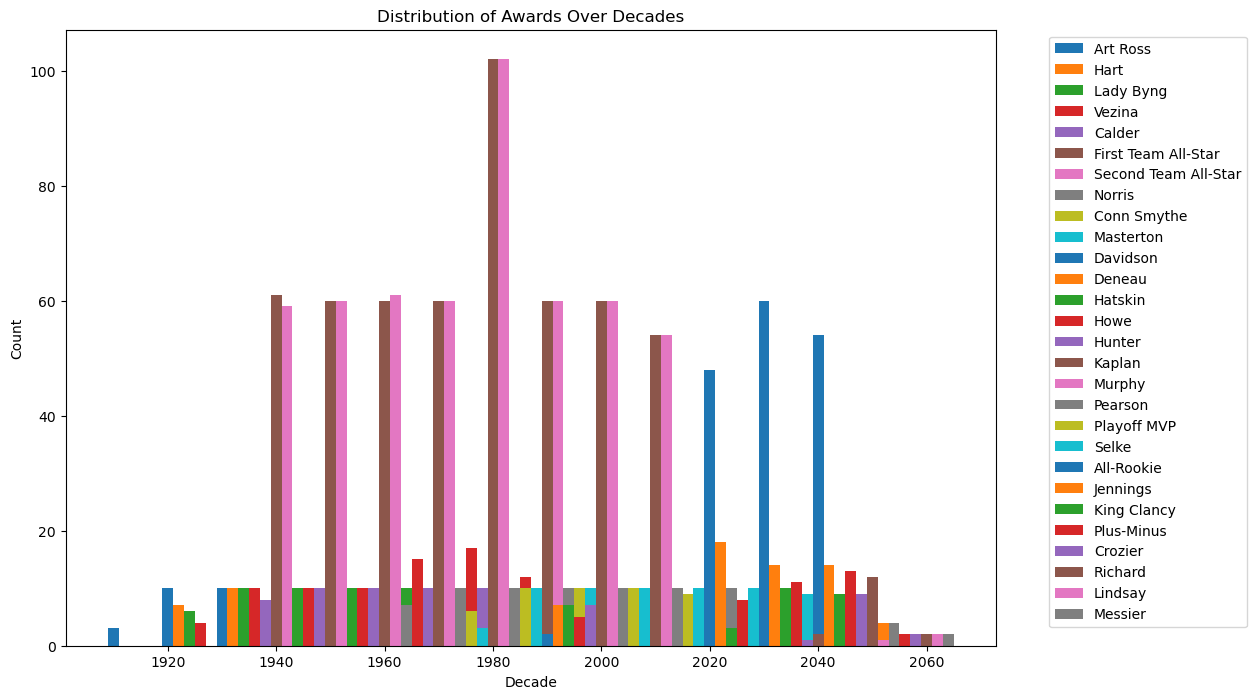

In [31]:
# Visualize player award distribution over decades 



# Set up the plot
plt.figure(figsize=(12, 8))


# Define the categories
awards = ['Art Ross', 'Hart', 'Lady Byng', 'Vezina', 'Calder',
       'First Team All-Star', 'Second Team All-Star', 'Norris',
       'Conn Smythe', 'Masterton', 'Davidson', 'Deneau', 'Hatskin',
       'Howe', 'Hunter', 'Kaplan', 'Murphy', 'Pearson', 'Playoff MVP',
       'Selke', 'All-Rookie', 'Jennings', 'King Clancy', 'Plus-Minus',
       'Crozier', 'Richard', 'Lindsay', 'Messier']

# Plot each category for each decade
for i, award in enumerate(awards):
    award_data = grouped_data[grouped_data['award'] == award]
    plt.bar(
        award_data['decade'] + i * bar_width,
        award_data['count'],
        width=bar_width,
        label=award
    )
# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Awards Over Decades')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



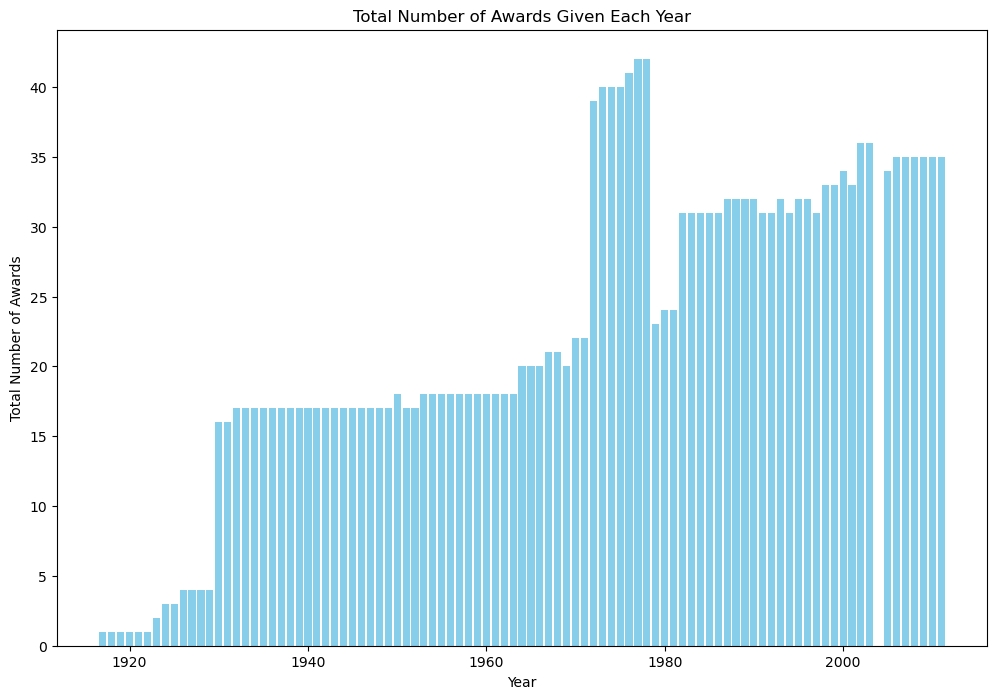

In [77]:
# Individual player awards

# Merge data to find player names
merged_player_data = pd.merge(master_data, player_awards_data, on='playerID')
#merged_player_data

# Find the players who won awards
players_with_awards = merged_player_data[pd.notnull(merged_player_data['award'])]
players_with_awards

# Merge first and last name columns to create 'player_name'
players_with_awards['player_name'] = players_with_awards['firstName'] + ' ' + players_with_awards['lastName']

# Create a new dataframe 
player_awards_summary = players_with_awards[['player_name', 'award', 'year']]

player_awards_summary

# Group by 'player_name', 'award', and 'year' and count the occurances 
total_awards_by_year = (
    player_awards_summary.groupby('year')['award']
    .count()
    .reset_index(name='total_awards_count')
)

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))

plt.bar(total_awards_by_year['year'], total_awards_by_year['total_awards_count'], color='skyblue')

plt.xlabel('Year')
plt.ylabel('Total Number of Awards')
plt.title('Total Number of Awards Given Each Year')

plt.show()

Olympic years vs non-Olympic years

In [88]:
# Find Olympic years

# Create a list of Olympic years (every four years starting in 1924, excluding 1940 and 1944)
actual_olympic_years = list(range(1924, 2025, 4))
actual_olympic_years.remove(1940)
actual_olympic_years.remove(1944)

actual_olympic_years

actual_olympic_years
# Filter the DataFrame for Olympic years
awards_olympic = total_awards_by_year[total_awards_by_year['year'].isin(actual_olympic_years)]

# Filter the DataFrame for non-Olympic years
awards_non_olympic = total_awards_by_year[~total_awards_by_year['year'].isin(actual_olympic_years)]

print("DataFrame for Olympic Years:")
print(awards_olympic)

print("\nDataFrame for Non-Olympic Years:")
print(awards_non_olympic)

DataFrame for Olympic Years:
    year  total_awards_count
7   1924                   3
11  1928                   4
15  1932                  17
19  1936                  17
31  1948                  17
35  1952                  17
39  1956                  18
43  1960                  18
47  1964                  20
51  1968                  21
55  1972                  39
59  1976                  41
63  1980                  24
67  1984                  31
71  1988                  32
75  1992                  31
79  1996                  32
83  2000                  34
90  2008                  35

DataFrame for Non-Olympic Years:
    year  total_awards_count
0   1917                   1
1   1918                   1
2   1919                   1
3   1920                   1
4   1921                   1
..   ...                 ...
88  2006                  35
89  2007                  35
91  2009                  35
92  2010                  35
93  2011                  35

[75 rows

In [92]:
# Descriptive statistics for Olympic years
olympic_stats = awards_olympic['total_awards_count'].describe()

# Descriptive statistics for Non-Olympic years
non_olympic_stats = awards_non_olympic['total_awards_count'].describe()

# Create a formatted string for display
olympic_stats_str = f"""
Descriptive Statistics for Olympic Years:
  Mean:      {olympic_stats['mean']}
  Median:    {olympic_stats['50%']}
  Std Dev:   {olympic_stats['std']}
  Min:       {olympic_stats['min']}
  Max:       {olympic_stats['max']}
"""

non_olympic_stats_str = f"""
Descriptive Statistics for Non-Olympic Years:
  Count:     {non_olympic_stats['count']}
  Mean:      {non_olympic_stats['mean']}
  Std Dev:   {non_olympic_stats['std']}
  Min:       {non_olympic_stats['min']}
  25%:       {non_olympic_stats['25%']}
  50%:       {non_olympic_stats['50%']}
  75%:       {non_olympic_stats['75%']}
  Max:       {non_olympic_stats['max']}
"""

# Print the formatted strings
print(olympic_stats_str)
print(non_olympic_stats_str)



Descriptive Statistics for Olympic Years:
  Mean:      23.736842105263158
  Median:    21.0
  Std Dev:   10.78497980868227
  Min:       3.0
  Max:       41.0


Descriptive Statistics for Non-Olympic Years:
  Count:     75.0
  Mean:      21.866666666666667
  Std Dev:   11.396221912277499
  Min:       1.0
  25%:       17.0
  50%:       18.0
  75%:       32.0
  Max:       42.0



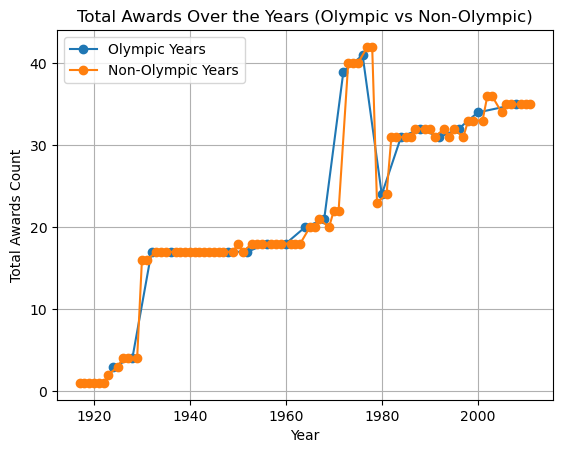

In [89]:
# Plotting DataFrame for Olympic Years
plt.plot(awards_olympic['year'], awards_olympic['total_awards_count'], label='Olympic Years', marker='o')

# Plotting DataFrame for Non-Olympic Years
plt.plot(awards_non_olympic['year'], awards_non_olympic['total_awards_count'], label='Non-Olympic Years', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Awards Count')
plt.title('Total Awards Over the Years (Olympic vs Non-Olympic)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

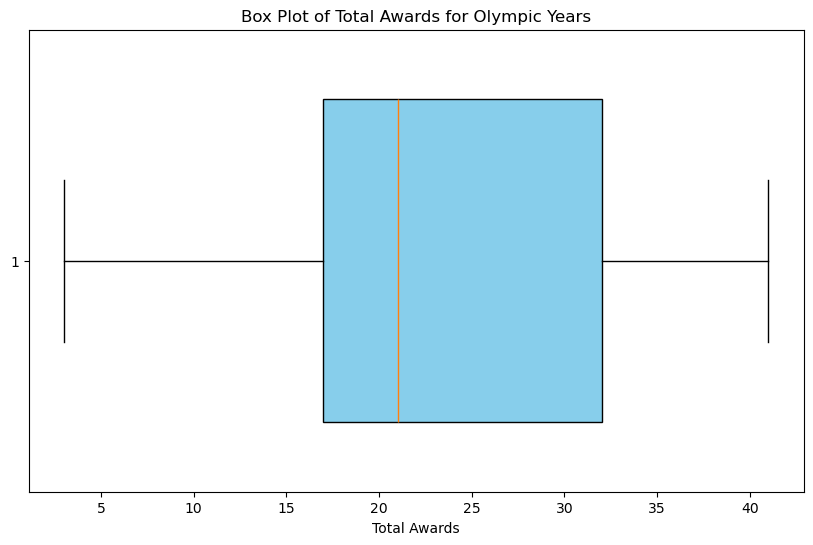

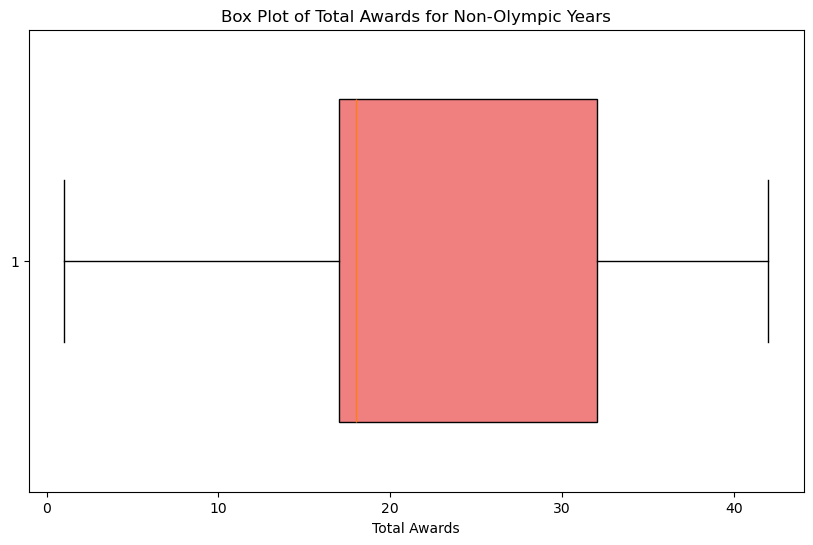

In [93]:
# No real insights, let's check for outlying years

# Create a box plot for Olympic years
plt.figure(figsize=(10, 6))
plt.boxplot(awards_olympic['total_awards_count'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Total Awards for Olympic Years')
plt.xlabel('Total Awards')
plt.show()

# Create a box plot for Non-Olympic years
plt.figure(figsize=(10, 6))
plt.boxplot(awards_non_olympic['total_awards_count'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of Total Awards for Non-Olympic Years')
plt.xlabel('Total Awards')
plt.show()